Prendere in analisi solo i valori numerici

\

**1. Analisi Univariata:** cercare e trattare outlier, valori nulli, valori settati a zero.

**2. Analisi Multivariata:** stabilire le relazioni tra le feature e la variabile da predirre. Descrivere le correlazioni del dataset.

**3. Split dei dati**

**4. Scala**

**5. Training**

**6. Training**

\


**Dataset:**
https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/carprice/carprice_data.csv



**Data description:**
https://github.com/FabioGagliardiIts/datasets/raw/main/carprice/carprice_data_dictionary.xlsx

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
file_path = 'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/carprice/carprice_data.csv'

df = pd.read_csv(file_path, delimiter=',')

display(df)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
print(df.isnull().sum())
print((df == 0).sum())


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
car_ID               0
symboling           67
CarName              0
fueltype             0
aspiration           0
doornumber           0
carbody              0
drivewheel           0
enginelocation       0
wheelbase            0
carlength            0
carwidth             0
carheight            0
curbweight           0
enginetype           0
cylindernumber       0
enginesize           0
fuelsystem           0
b

In [5]:
columns_drop = ["CarName","symboling", "fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "car_ID", "fuelsystem", "enginelocation", "enginetype", "cylindernumber"]
subset = df.drop(columns=columns_drop)

In [6]:
display(subset)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
print(subset.isnull().sum().sum())
print((subset == 0).sum().sum())
subset.describe()


0
0


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


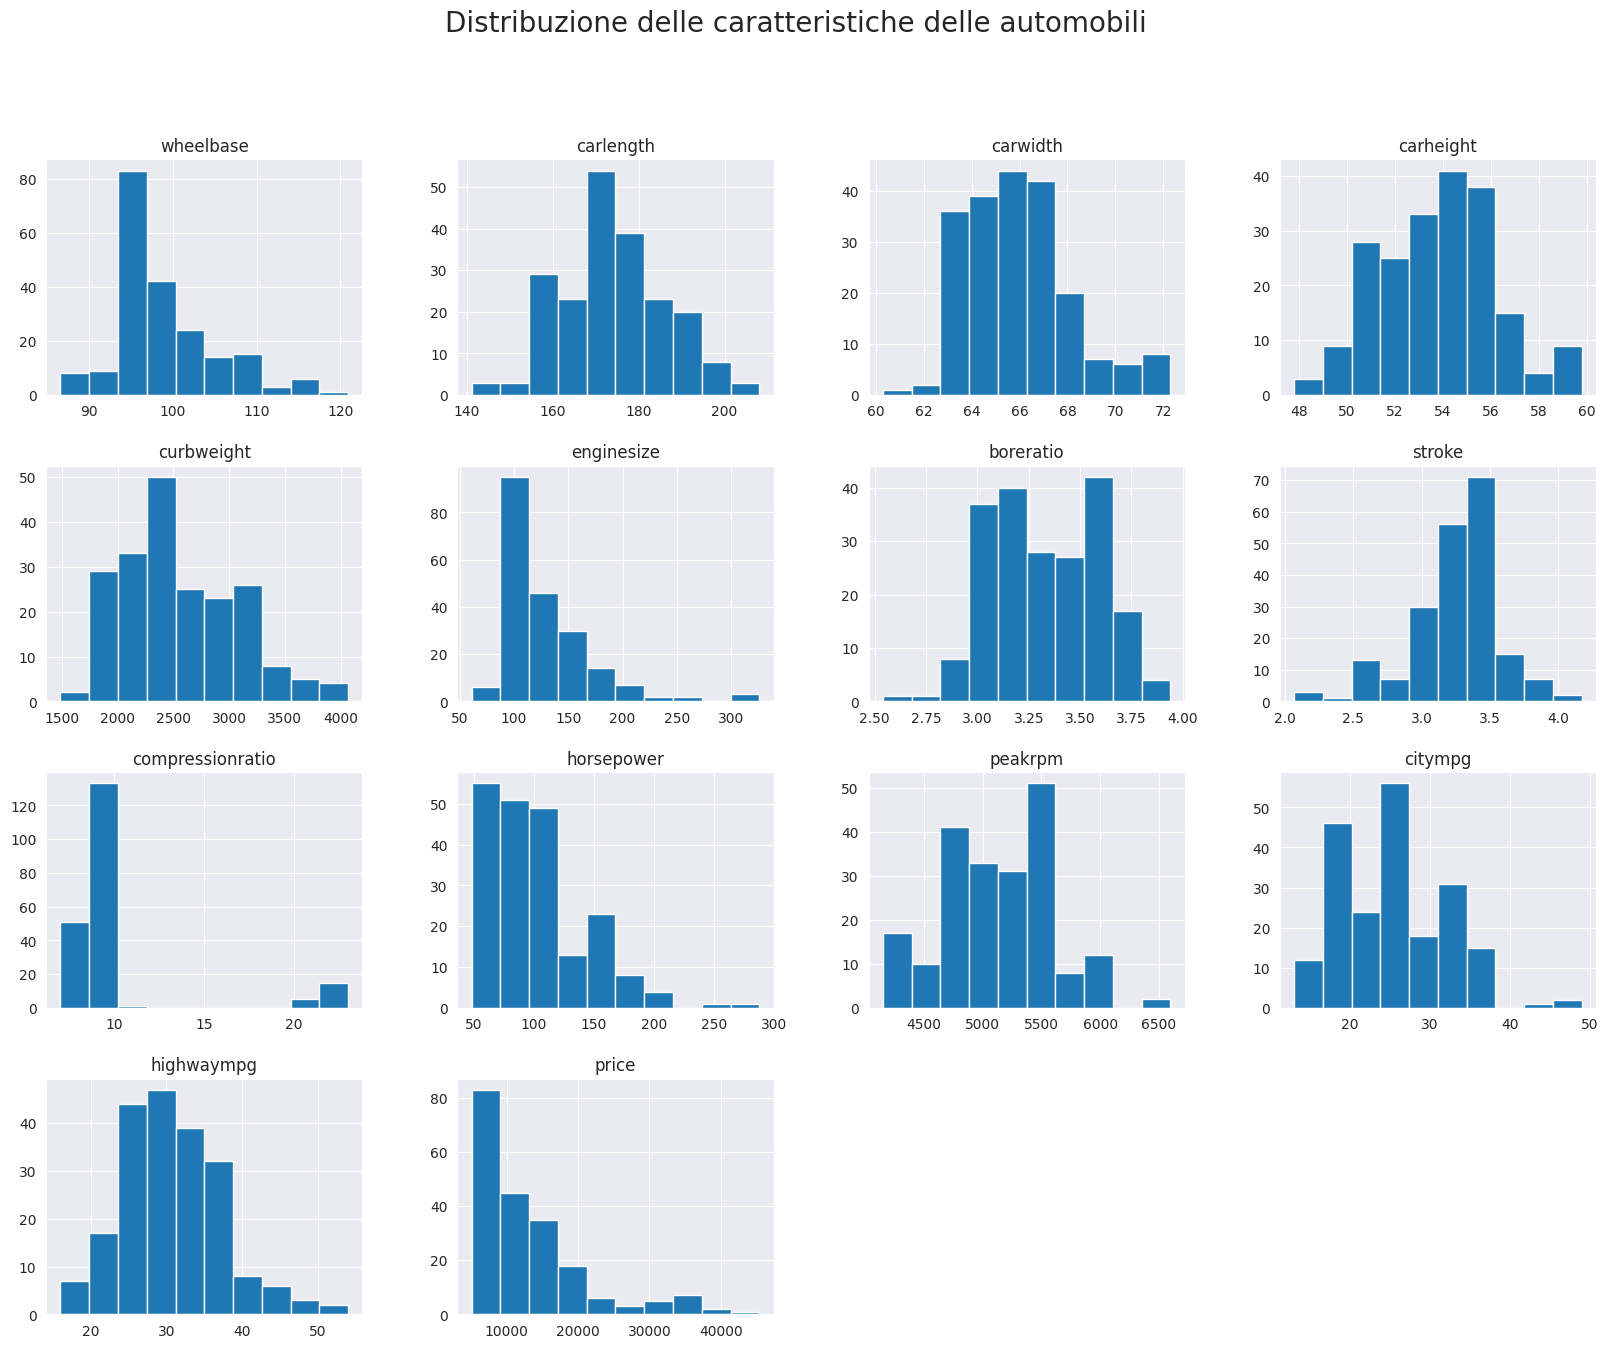

In [8]:
subset.hist(figsize=(20,15))
plt.suptitle("Distribuzione delle caratteristiche delle automobili", fontsize=20)
plt.show()

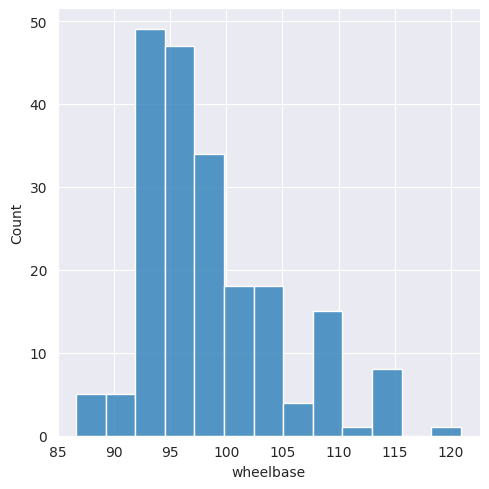

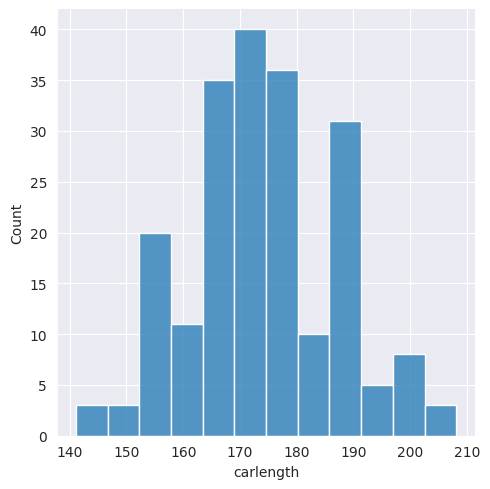

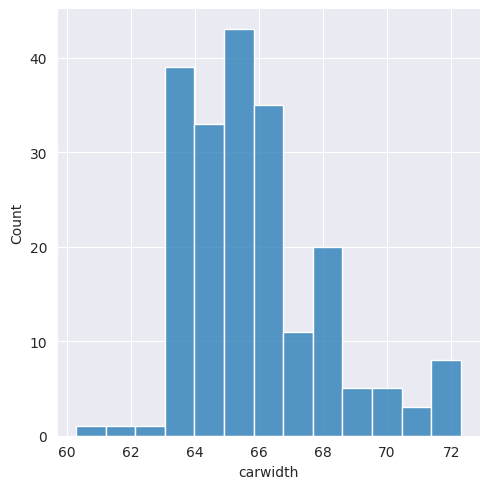

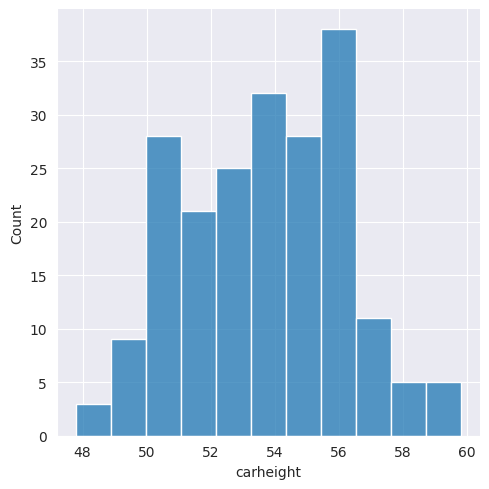

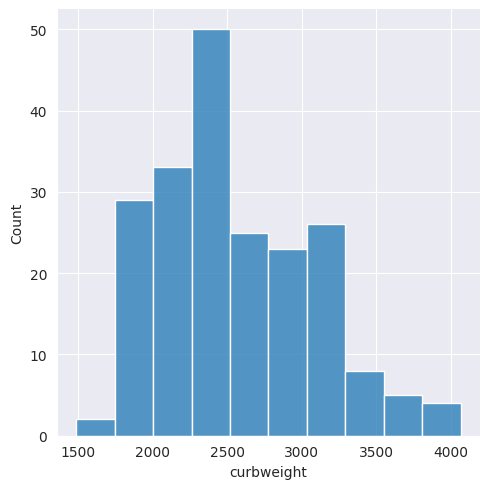

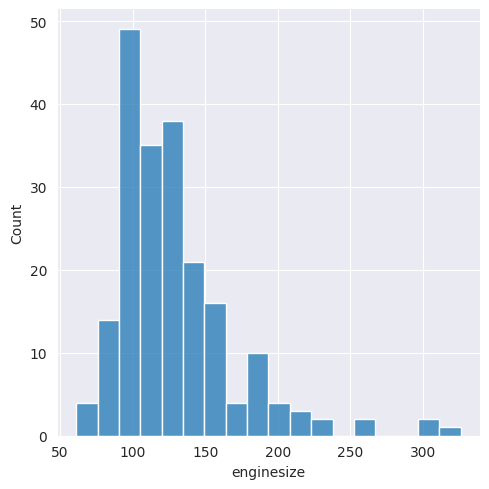

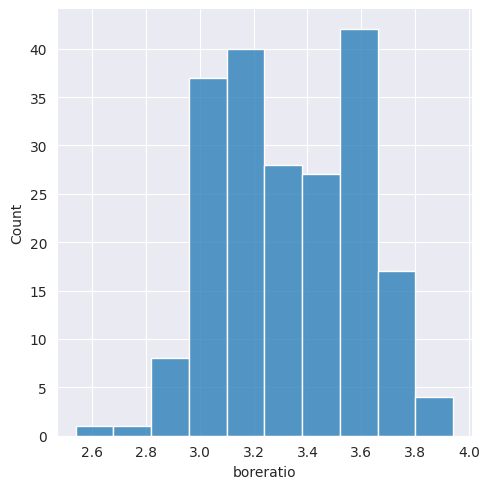

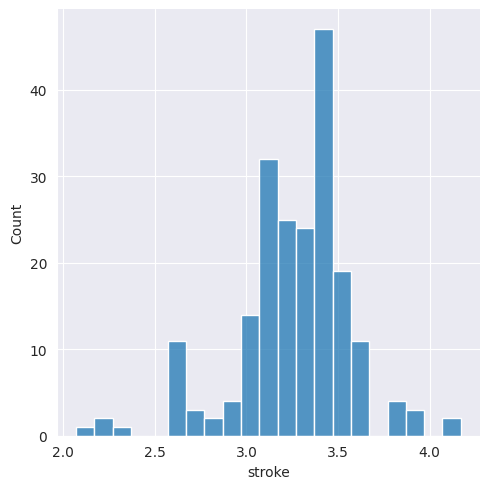

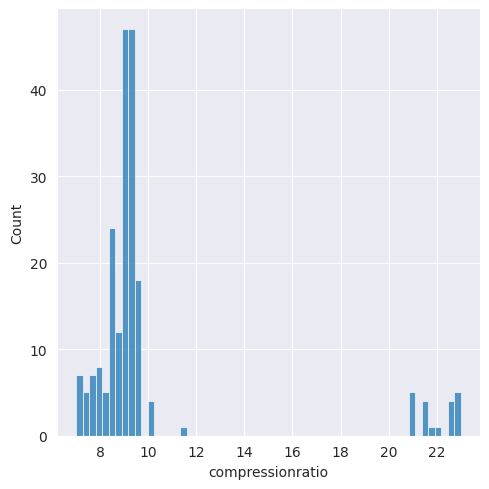

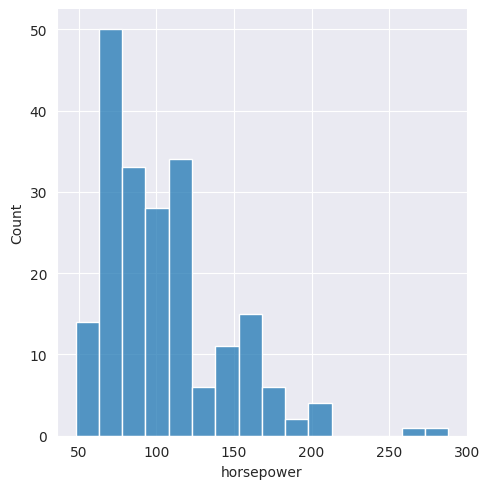

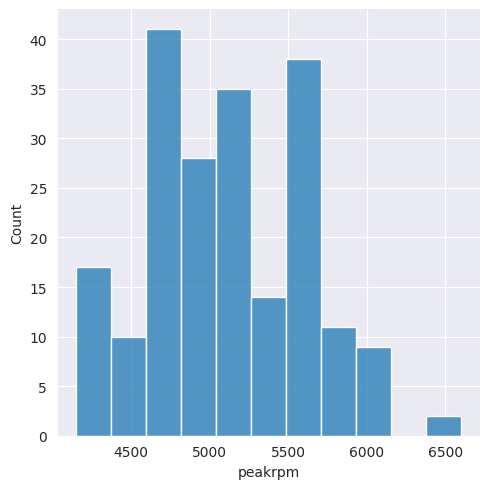

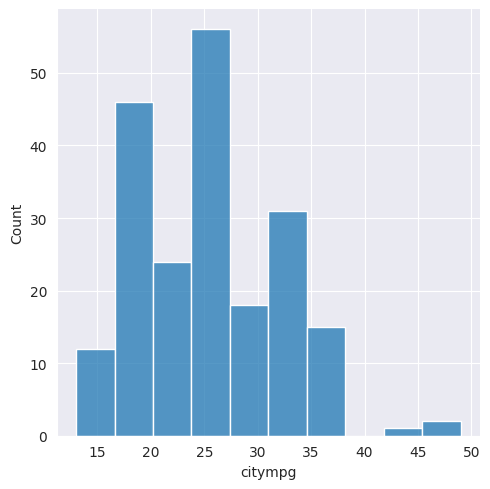

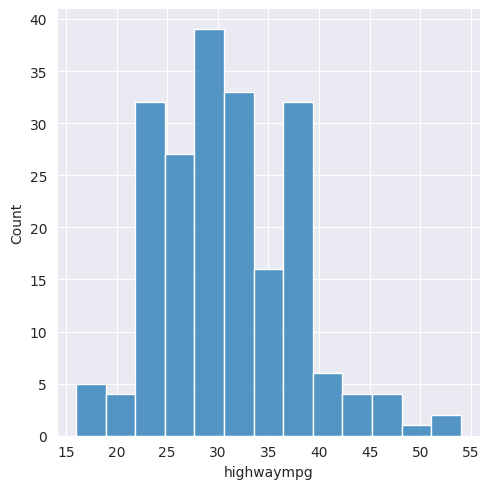

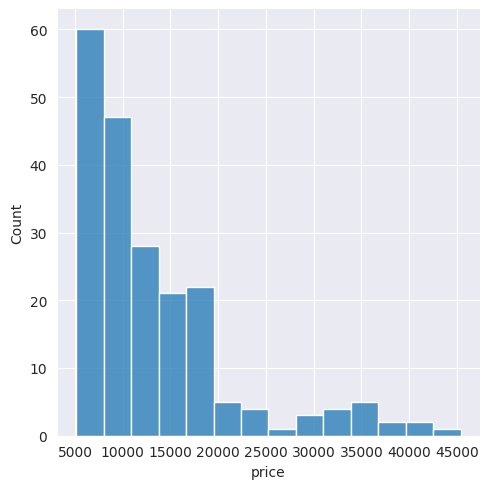

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Itera su tutte le colonne del DataFrame
for col in subset.columns:
    # Crea il grafico di distribuzione per la colonna corrente
    sns.displot(subset[col])
    # Visualizza il grafico
    plt.show()


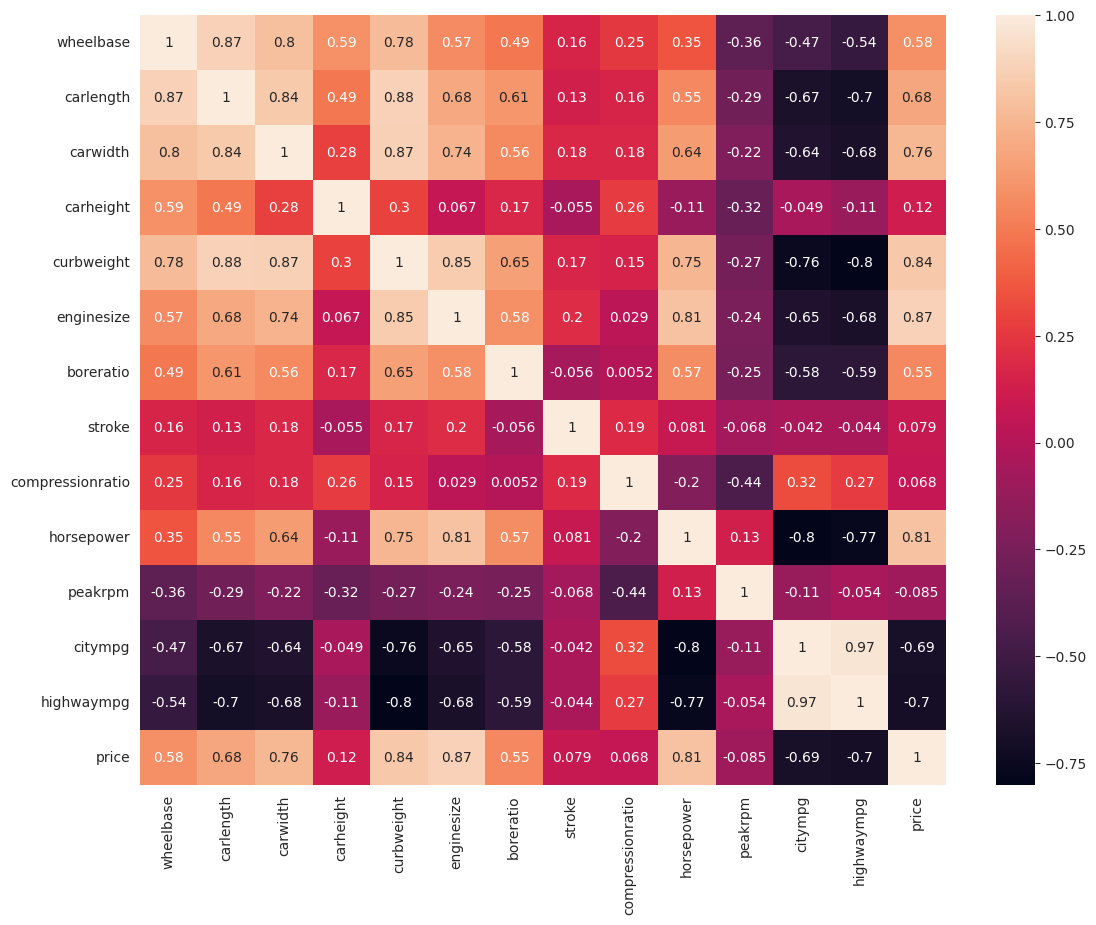

In [10]:
import seaborn as sns
plt.figure(figsize=(13, 10))
corr_matrix = subset.corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

subset_x = subset.drop('price', axis=1)
display(subset_x)

subset_y = subset['price']
display(subset_y)

# separa il dataset in 80% training test 20% test set
x_train, x_test, y_train, y_test = train_test_split(subset_x, subset_y, test_size=0.2)




,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [12]:
print("x train shape: ", x_train.shape)
print("y train shape: ", y_train.shape)

print("x test shape: ", x_test.shape)
print("y test shape: ", y_test.shape)

x train shape:  (164, 13)
y train shape:  (164,)
x test shape:  (41, 13)
y test shape:  (41,)


In [13]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()


lr.fit(x_train, y_train)


LinearRegression()

In [14]:
# uso il set di test per predirre dei valori
y_pred_1 = lr.predict(x_test)

In [15]:
from sklearn.metrics import mean_squared_error

mse_test_1 = mean_squared_error(y_test, y_pred_1)
rmse_test_1 = np.sqrt(mse_test_1)

print(subset_y.max(), subset_y.min())
print(f"STIMA DELL'ERRORE MEDIO NELLA PREDIZIONE DELLE ETICHETTE: {rmse_test_1}")

45400.0 5118.0
STIMA DELL'ERRORE MEDIO NELLA PREDIZIONE DELLE ETICHETTE: 3590.3208300183937


In [16]:
from sklearn.metrics import r2_score

r2_tst_1 = r2_score(y_test, y_pred_1)


print(f"LE ETICHETTE PREDETTE E DI TEST HANNO LA STESSA VARIANZA AL : {r2_tst_1 * 100:.3f}%")

print(lr.score(x_train, y_train) * 100)

LE ETICHETTE PREDETTE E DI TEST HANNO LA STESSA VARIANZA AL : 83.965%
85.05729563091624


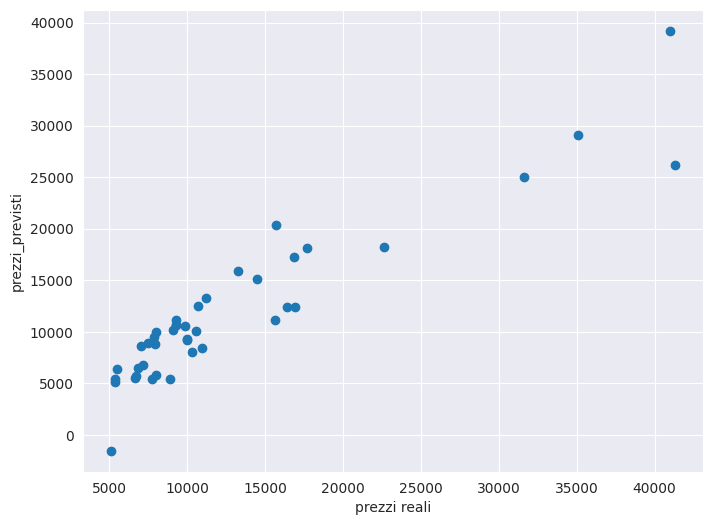

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_1)
plt.xlabel("prezzi reali")
plt.ylabel("prezzi_previsti")
plt.show()

libreria per esportare i file .pmml: https://github.com/jpmml/sklearn2pmml

libreria per importare i file .pmml: https://github.com/autodeployai/pypmml

In [18]:
# installo sklearn2pmml
# !pip install sklearn2pmml

#installo pypmml
# !pip install pypmml

In [19]:
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline

In [20]:
pmml_pipe = PMMLPipeline(steps=[ ("lr", lr)])
pmml_pipe.fit(x_train, y_train)
sklearn2pmml(pmml_pipe, "car.pmml", with_repr = True)


Standard output is empty
Standard error:
Exception in thread "main" net.razorvine.pickle.PickleException: expected zero arguments for construction of ClassDict (for numpy._core.multiarray._reconstruct). This happens when an unsupported/unregistered class is being unpickled that requires construction arguments. Fix it by registering a custom IObjectConstructor for this class.
	at net.razorvine.pickle.objects.ClassDictConstructor.construct(ClassDictConstructor.java:23)
	at net.razorvine.pickle.Unpickler.load_reduce(Unpickler.java:759)
	at net.razorvine.pickle.Unpickler.dispatch(Unpickler.java:200)
	at org.jpmml.python.CustomUnpickler.dispatch(CustomUnpickler.java:32)
	at net.razorvine.pickle.Unpickler.load(Unpickler.java:110)
	at numpy.core.NDArrayUtil.readObject(NDArrayUtil.java:433)
	at numpy.core.TypeDescriptor.read(TypeDescriptor.java:172)
	at numpy.core.NDArrayUtil.parseArray(NDArrayUtil.java:243)
	at numpy.core.NDArrayUtil.parseData(NDArrayUtil.java:208)
	at joblib.NumpyArrayWrappe

RuntimeError: The SkLearn2PMML application has failed. The Java executable should have printed more information about the failure into its standard output and/or standard error streams